# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

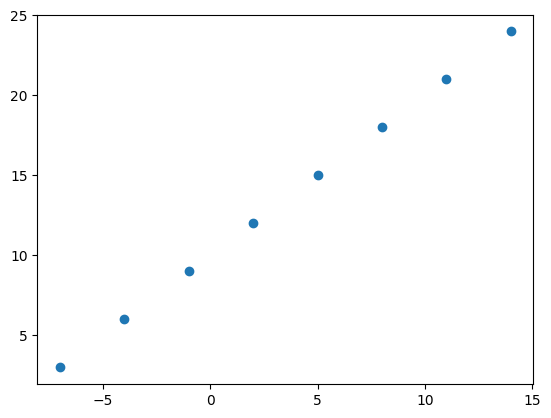

In [2]:
# Create Featuers
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing 
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
house_info

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>

In [6]:
house_price

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>

In [7]:
# Turn the NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modelling with TensorFlow

1. **Creating a model**: define the input & output layers, as well as the hidden layers of a deep learning model.
2. **Compilin a model**: define the loss function (in other words, the function which tells the model how wrong it is), the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (evaluate/interpret the performance of the model).
3. **Fitting a model**: letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae == mean absolute error
             optimizer = tf.keras.optimizers.legacy.SGD(), # sgd == stochastic gradient descent,
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10


2023-06-16 09:32:05.826249: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 235ms/step - loss: 12.9534 - mae: 12.9534
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 12.8209 - mae: 12.8209
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 12.6884 - mae: 12.6884
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 12.5559 - mae: 12.5559
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 12.4234 - mae: 12.4234
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 12.2909 - mae: 12.2909
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 12.1584 - mae: 12.1584
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 12.0259 - mae: 12.0259
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 11.8934 - mae: 11.8934
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 11.7609 - mae: 11.7609


In [10]:
# prediction using the model
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[8.70502]], dtype=float32)

## Improving the model
 
The model could be improve by altering the steps that was taken to create the model
 
1. **Creating a model**: add more layers, increase the numbers of hidden units(called neurons) within each of the hiden layers, and change the activation function of each layer.
2. **Compiling the model**: might change the optimization function or the **learning rate** of the optimization function
3. **Fitting the model**:fit the model with more **epochs**(leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Recreating the model 1

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae, # mae == mean absolute error
             optimizer = tf.keras.optimizers.legacy.SGD(), # sgd == stochastic gradient descent,
             metrics = ["mae"])

# 3. Fit the model
model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 141ms/step - loss: 20.6571 - mae: 20.6571
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 20.3201 - mae: 20.3201
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 20.0388 - mae: 20.0388
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 19.7576 - mae: 19.7576
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 19.4763 - mae: 19.4763
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 19.1951 - mae: 19.1951
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 18.9138 - mae: 18.9138
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 18.6326 - mae: 18.6326
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 18.3513 - mae: 18.3513
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 18.0701 - mae: 18.0701
Epoch 11/100
1/1 [==============================] - 0s 7m

In [12]:
# prediction using the model
model1.predict([17.0])

1/1 [==============================] - 0s 124ms/step


array([[29.32527]], dtype=float32)

In [13]:
# Recreating the model 2

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics = ["mae"])

# 3. Fit the model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 331ms/step - loss: 12.8578 - mae: 12.8578
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8163 - mae: 12.8163
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7750 - mae: 12.7750
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7359 - mae: 12.7359
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6967 - mae: 12.6967
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6575 - mae: 12.6575
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6183 - mae: 12.6183
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.5790 - mae: 12.5790
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5401 - mae: 12.5401
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5017 - mae: 12.5017
Epoch 11/100
1/1 [==============================] - 0s 7m

In [14]:
# prediction using the model
model2.predict([17.0])

1/1 [==============================] - 0s 54ms/step


array([[13.813232]], dtype=float32)

In [15]:
# Recreating the model 3

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.legacy.Adam(lr=0.01),
             metrics = ["mae"])

# 3. Fit the model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 189ms/step - loss: 12.2543 - mae: 12.2543
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.5267 - mae: 11.5267
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7856 - mae: 10.7856
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0293 - mae: 10.0293
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2560 - mae: 9.2560
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4641 - mae: 8.4641
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6517 - mae: 7.6517
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9154 - mae: 6.9154
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9404 - mae: 6.9404
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2217 - mae: 7.2217
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [16]:
# prediction using the model
model3.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[27.068178]], dtype=float32)

## Evaluating the model

When it comes to evaluation, we need to

> "Visualize, visualize, Visualize"

It's always a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
y = X + 10

In [18]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

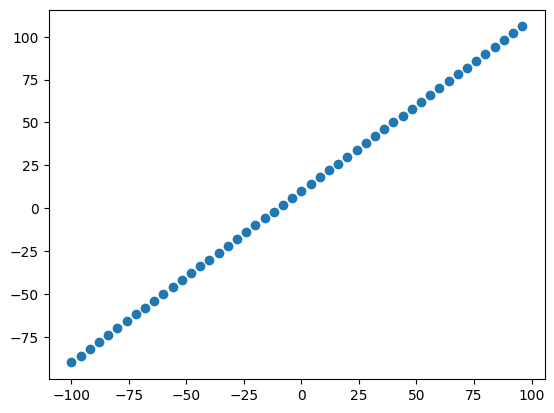

In [20]:
# Visualize the data
plt.scatter(X, y);

### Splitting the dataset

In [21]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [22]:
len(X), len(y)

(50, 50)

In [23]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.legacy.SGD(),
             metrics = ['mae'])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total no of parameters in the model.
* Trainable params - parameters(patterns) the model can update as it trains.
* Non-trainable params - parameters aren't updated during training (this is typical when you bring in already learn patterns/parameters from other models during **transfer learning**).

In [25]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

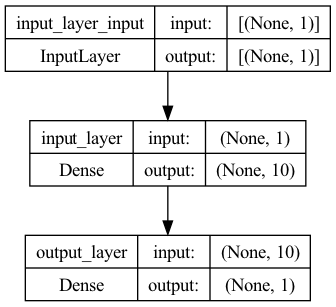

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to lot them against the ground truth labels. Often in the form of `y_test`/`y_true` versus `y_pred` (ground truth versus model's prediction).

In [27]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[ 69.59992 ],
       [ 74.12364 ],
       [ 78.647354],
       [ 83.171074],
       [ 87.69479 ],
       [ 92.218506],
       [ 96.74222 ],
       [101.26594 ],
       [105.78965 ],
       [110.31338 ]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [29]:
# Creating the Plot Function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, label="Training data")
    plt.scatter(test_data, test_labels, label="Testing data")
    plt.scatter(test_data, predictions, label="Predictions")
    plt.legend()
    plt.show()

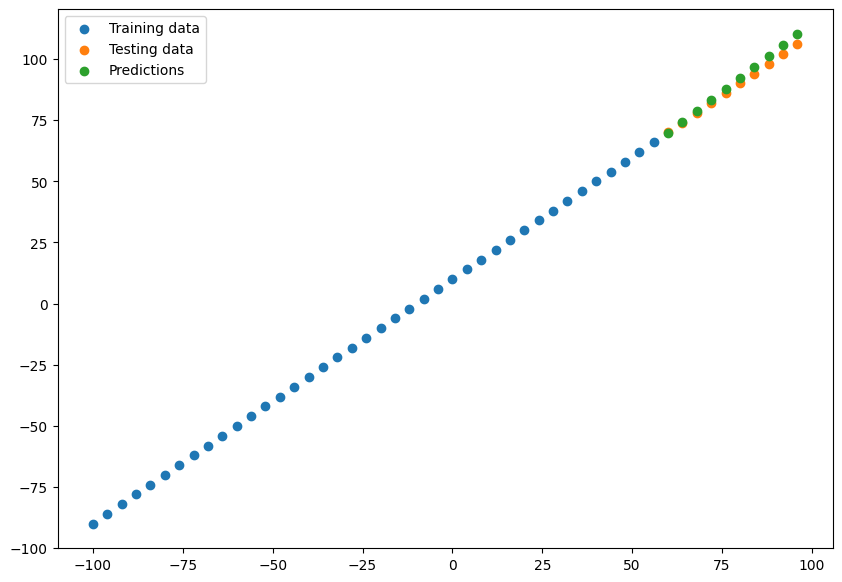

In [30]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluting the model's prediction with regression evaluation metrics

In [31]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 2.0367 - mae: 2.0367


[2.036663055419922, 2.036663055419922]

In [32]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.036663>

In [33]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.0912704>

In [34]:
# Make a function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

## Improving the model

In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=["mse"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 29ms/step


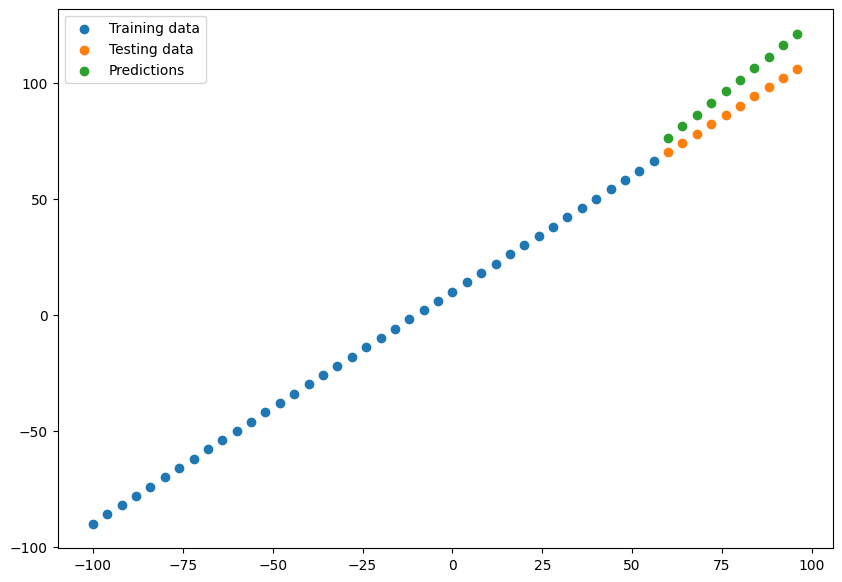

In [36]:
# Make and Plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [37]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=10.630229>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.75354>)

**Build model 2**

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(X_train, y_train, epochs=120, verbose=0)

1/1 [==============================] - 0s 45ms/step


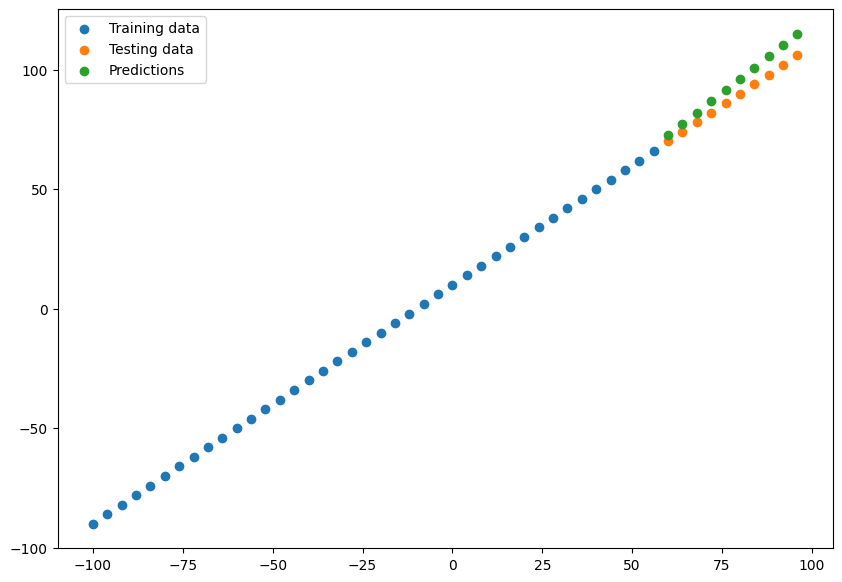

In [39]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [40]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.8863373>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.792713>)

## Comparing the results of our experiments

In [41]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,10.630229,120.753540
1,model_2,5.886337,38.792713


## Working on a Larger dataset

In [42]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
insurance.shape

(1338, 7)

In [44]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
# One-hot encode the DataFrame
df = pd.get_dummies(insurance)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [47]:
# Create X & y values (features and labels)
X = df.drop("charges", axis=1)
y = df["charges"]

In [48]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
tf.random.set_seed(42)

# create a model
df_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
df_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.legacy.SGD(),
                 metrics=["mae"])

# fit the model
df_model.fit(X_train, y_train, epochs=100, verbose=0)

In [50]:
# Check the results of the insurance model on the test data
df_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 11ms/step - loss: 7273.4526 - mae: 7273.4526


[7273.45263671875, 7273.45263671875]

In [54]:
# Re-training the model
df_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
df_model_2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.legacy.Adam(lr=0.01),
                   metrics = ["mae"])

# Fit the model
df_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [55]:
# Check the results of the insurance model on the test data
df_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 37ms/step - loss: 3155.8328 - mae: 3155.8328


[3155.832763671875, 3155.832763671875]

In [62]:
# Create a model (same as model_2)
df_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
df_model_3.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.legacy.Adam(lr=0.01),
                   metrics=["mae"])

# Fit the model
history = df_model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [63]:
# Evaluate the 3rd model
df_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3164.8152 - mae: 3164.8152


[3164.815185546875, 3164.815185546875]

In [64]:
# Implementing the early stopping callback
df_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
df_model_4.compile(loss = tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                   metrics=["mae"])

# Create early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

# Fit the model
history_1 = df_model_4.fit(X_train, y_train, epochs=300, verbose=0, callbacks=[callback])

In [65]:
# Evaluate the 3rd model
df_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3545.4370 - mae: 3545.4370


[3545.43701171875, 3545.43701171875]